# Mesa Testing

In this notebook we test and develop the needed classes that are going to be used in the eventual P2P-energy trading simulation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

import mesa
from datetime import datetime
from dateutil.relativedelta import relativedelta

from utils import generate_household_dataframe

In [2]:
from datetime import timedelta

In [3]:
def generate_grid_prize_data(n_days=365, start_date=datetime(2024, 1, 1), base_price=0.1998, solar_csv_path="data/solar_strength.csv"):
    solar_df = pd.read_csv(solar_csv_path, index_col="DATE")

    daily_solar = solar_df.sum(axis=1)
    normalized_solar = (daily_solar - daily_solar.min()) / (daily_solar.max() - daily_solar.min())

    data = []
    drift = 0

    for day_offset in range(n_days):
        current_datetime = start_date + timedelta(days=day_offset)
        date_str = current_datetime.strftime("%d-%m-%Y")

        days_since_start = (current_datetime - start_date).days
        continuous_month_index = days_since_start / 30

        trend = -0.01 * math.log1p(continuous_month_index  + 1)
        seasonal = 0.005 * math.cos((2 * math.pi / 12) * continuous_month_index )

        if date_str in normalized_solar:
            solar_strength = normalized_solar.loc[date_str]
            solar_influence = -0.01 * solar_strength
        else:
            solar_influence = 0

        price = round(base_price + trend + seasonal + drift + solar_influence, 4)

        data.append({
            'date': date_str,
            'energy_grid_price': price
        })

    return pd.DataFrame(data).set_index("date")

<Axes: xlabel='date'>

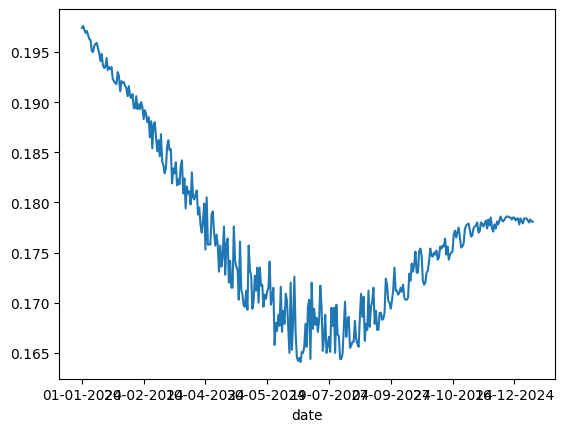

In [4]:
data = generate_grid_prize_data(n_days=366)
data["energy_grid_price"].plot()

In [5]:
profile_ratios = {
    'vroege_vogel': 0.2,
    'avondmens': 0.3,
    'standaard': 0.4,
    'zuinig': 0.1
}

df = generate_household_dataframe(n_days=10, n_households=10, profile_ratios=profile_ratios)
print(df['profiel'].value_counts())

profiel
standaard       40
avondmens       30
vroege_vogel    20
zuinig          10
Name: count, dtype: int64


In [6]:
consumption_df = generate_household_dataframe(n_days=366, n_households=30)
production_df = pd.read_csv("data/solar_strength.csv", index_col="DATE")

In [7]:
display(consumption_df.tail())
display(production_df.head())

,household,profiel,totaal_kWh,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
datum,,,,,,,,,,,,,,,,,,,,,
27-12-2024,household_30,vroege_vogel,10.689906,0.089930,0.093580,0.091615,0.092742,0.086629,0.075778,0.591641,...,0.508373,0.560812,0.555122,0.530651,0.493163,0.535368,0.504810,0.601335,0.500348,0.545100
28-12-2024,household_30,vroege_vogel,12.863020,0.100689,0.101928,0.095047,0.104672,0.109850,0.094211,0.552066,...,0.537743,0.592887,0.599821,0.580265,0.586306,0.482017,0.470676,0.508931,0.528625,0.529380
29-12-2024,household_30,vroege_vogel,10.900274,0.096163,0.096909,0.069453,0.092485,0.084040,0.084578,0.689932,...,0.593419,0.550425,0.522988,0.606847,0.551226,0.574193,0.603329,0.560277,0.617259,0.551603
30-12-2024,household_30,vroege_vogel,12.244598,0.102353,0.085942,0.091561,0.078896,0.089811,0.090427,0.589131,...,0.465461,2.169678,0.522715,0.580975,0.596022,0.491296,0.536373,0.546000,0.596312,0.495537
31-12-2024,household_30,vroege_vogel,10.500279,0.091607,0.076051,0.090534,0.084633,0.089117,0.094347,0.502372,...,0.504950,0.539383,0.612896,0.452444,0.578209,0.481725,0.584168,0.512935,0.603084,0.532120


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DATE,,,,,,,,,,,,,,,,,,,,,
01-01-2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.50,36.17,...,97.17,8.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02-01-2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,13.50,46.33,...,8.33,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03-01-2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,9.67,44.17,...,12.00,5.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04-01-2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,8.67,53.17,...,67.67,18.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05-01-2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33,8.33,31.50,...,27.33,7.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
class Household_2(mesa.Agent):
    """
    The Household Agent is the basic Agent template used during our sumulations.
    It is able to withdraw information about its own consumption and production details
    from our synthetically generated data. Next to that, it holds the capacity to trade
    energy with other Agents in the simulation.

    Methods:
    ----------
    trade_energy(self)
        A method that functions as the main use for our Agents. Using this method makes
        the agent look up the needed consumption and production data, along with trading
        energy with other Agents.

    _calculate_energy(self)
        A method used to calculate the energy surplus or deficit, using its corresponding
        consumption and solar strength values. The producyion is calculated as follows:
            Production = solar_strength * (amount_of_solar_panels * avg_area_per_solar_panel)
    
    _lookup_data_for_agent(self, data)
        A method that uses the dataframe in order to find the needed consumption and
        solar strength value.
    
    _trading(self)
        A method holding the trading methods and logic for when not to start trading.
    
    _look_for_trades(self)
        A method that looks through the Agents for potential buyers and sellers.

    _exchange_energy(self)
        A method that handles the logic to exchange energy until either the buyer has
        enough or until the seller no longer has a surplus.
    """

    def __init__(self, model):
        """
        Initializes a household agent with a random number of solar panels and several other
        attributes needed to run the code without errors.
        """
        super().__init__(model)

        self.solar_panel_area = 0

        solar_panels = np.array([4, 8, 10, 12, 16])
        probabilities = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
        probabilities /= probabilities.sum()

        # Handling the solar panel logic
        if np.random.rand() < self.model.solar_panel_odds:
            amount_of_panels = np.random.choice(solar_panels, p=probabilities)
            self.solar_panel_area = amount_of_panels * 1.7

        self.supply = 1
        self.demand = 1

        self.remaining_energy = 0
        self.traded_energy = 0
        self.consumed = 0
        self.produced = 0
        self.trade_amount = 0

        # print(f"[INIT] Household initialized with {self.amount_of_solarpanels} solar panels.")
        # print(f"[INIT] Consumption: {self.consumption_data} | Production: {self.production_data}")

    def trade_energy(self):
        # print(f"\n[TRADE] Time: Day {self.model.day_str}, Hour {self.model.hour}")
        self._calculate_energy()
        self._trading()

        if self.remaining_energy > 0:
            self.model.hourly_supply[self.model.hour] += self.remaining_energy
        else:
            self.model.hourly_demand[self.model.hour] += abs(self.remaining_energy)

        self._update_dataframe()
        self.traded_energy = 0

    def _calculate_energy(self):
        self.consumed = self._lookup_data_for_agent(self.model.consumption_data)
        self.solar_strength = self.model.production_data.loc[self.model.day_str, f"{self.model.hour}"]

        # Wh = (W/m2 * m2) * h
        # kWh = Wh / 1000
        self.produced = (self.solar_strength * self.solar_panel_area * 0.2) / 1000

        self.remaining_energy = self.produced - self.consumed
        # print(f"[CALC] Consumed: {self.consumed}, Produced: {self.produced}, Remaining: {self.remaining_energy}")

    def _lookup_data_for_agent(self, data):
        household_id = f"household_{self.unique_id}"
        day_data = data.loc[self.model.day_str]
        lookup_data = day_data[day_data["household"] == household_id][f"{self.model.hour}"].values[0]
        return lookup_data

    def _trading(self):
        self._look_for_trades()
        if not self.buyers:
            # print("[TRADE] No buyers found.")
            return

        if self.remaining_energy <= 0:
            # print("[TRADE] No surplus energy to trade.")
            return

        self._exchange_energy(self.buyers)

    def _look_for_trades(self):
        self.buyers = [
            agent for agent in self.model.agents
            if agent.remaining_energy < agent.consumed
        ]
        self.sellers = [
            agent for agent in self.model.agents
            if agent.remaining_energy > agent.consumed
        ]
        # print(f"[MARKET] Buyers: {len(self.buyers)} | Sellers: {len(self.sellers)}")

    def _exchange_energy(self, buyers):
        for buyer in buyers:
            potential_trade = buyer.consumed - buyer.remaining_energy
            if potential_trade <= 0:
                continue

            trade_amount = min(self.remaining_energy, potential_trade)

            if trade_amount <= 0:
                continue

            self.remaining_energy -= trade_amount
            buyer.remaining_energy += trade_amount

            self.traded_energy += trade_amount
            buyer.traded_energy -= trade_amount

            # print(f"[EXCHANGE] Traded {trade_amount} units to Buyer (ID: {buyer.unique_id})")
            # print(f"[TRADER] Remaining energy: {self.remaining_energy}W")

            if self.remaining_energy <= 0:
                # print("[TRADE] No more energy to trade.")
                break

    def _update_dataframe(self):
        earnings = self.traded_energy * (self.model.grid_price - self.model.energy_price)

        agent_data = {
            "solarpanel_area": self.solar_panel_area,
            "consumed": self.consumed,
            "produced": self.produced,
            "traded": self.traded_energy,
            "earnings": earnings
        }

        new_row = pd.DataFrame(
            [agent_data],
            index=pd.MultiIndex.from_arrays(
                [[self.model.day_str], [self.model.hour], [self.unique_id]],
                names=["Day", "Hour", "Agent_ID"]
                )
        )

        self.model.agent_data = pd.concat([self.model.agent_data, new_row])

In [126]:
class NewGrid(mesa.Model):
    def __init__(self, n, consumption_data, production_data, grid_prize_data, solar_panel_odds=0.35, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.solar_panel_odds = solar_panel_odds

        self.consumption_data = consumption_data
        self.production_data = production_data
        self.grid_price_df = grid_prize_data

        self.datetime = datetime(2024, 1, 1)
        self.hour = 0
        self.day_str = self.datetime.strftime("%d-%m-%Y")

        self.hourly_demand = [0] * 24
        self.hourly_supply = [0] * 24
        self.energy_delta = 0

        self.grid_price = self.grid_price_df.loc[self.day_str].values[0]
        self.energy_price = self.grid_price - 0.01

        self.smoothing = 0.3
        self.elasticity = 0.4
        self.min_price = 0.05

        self.simulation_data = pd.DataFrame()
        self.agent_data = pd.DataFrame()

        Household_2.create_agents(model=self, n=n)

    def _time_skip(self):
        if self.hour != 23:
            self.hour += 1
        else:
            self.datetime += relativedelta(days=1)
            self.day_str = self.datetime.strftime("%d-%m-%Y")
            self.hour = 0

            self._update_energy_price()

             # Reset hourly demand/supply for next day
            self.hourly_demand = [0] * 24
            self.hourly_supply = [0] * 24

    def _update_energy_price(self):
        # Grid price update
        self.grid_price = self.grid_price_df.loc[self.day_str].values[0]

        # Calculating target price
        target_price = self._calculate_target_price()

        # --- Smoothed Transition ---
        self.energy_price = (1 - self.smoothing) * self.energy_price + self.smoothing * target_price

        # Ensuring it never exceeds the grid price
        self.energy_price = max(self.min_price, min(self.energy_price, self.grid_price))

        # Output energy price for the day
        print(f"[DAILY PRICE UPDATE :: {self.day_str}]: "
            f"Price={self.energy_price:.4f} | "
            f"Grid Price={self.grid_price:.4f} | "
            # f"Supply={self.hourly_supply}\n"
            # f"Demand={self.hourly_demand}"
            )

    def _calculate_target_price(self):
        demand_list = self.hourly_demand
        supply_list = self.hourly_supply

        # Avoid zero division
        valid_hours = [i for i in range(24) if supply_list[i] > 0]
        if not valid_hours:
            return self.grid_price  # fallback

        hourly_pressures = [
        demand_list[i] / supply_list[i] for i in valid_hours
        ]
        
        # Calculate the average pressure across valid hours
        self.market_pressure = np.mean(hourly_pressures)

        # If demand exceeds supply, increase the price, but with diminishing returns
        if self.market_pressure > 1:
            # The more extreme the imbalance, the stronger the price increase
            price_increase = (self.market_pressure - 1) * self.elasticity
            new_price = self.energy_price * (1 + price_increase)
        else:
            # If supply exceeds demand, decrease the price but not too sharply
            price_decrease = (1 - self.market_pressure) * self.elasticity
            new_price = self.energy_price * (1 - price_decrease)

        return new_price

    def collect_hourly_data(self):
        microgrid_demand = self.hourly_demand[self.hour]
        microgrid_supply = self.hourly_supply[self.hour]

        sim_data = {
            "grid_price": self.grid_price,
            "local_price": self.energy_price,
            "market_pressure": microgrid_demand / microgrid_supply if microgrid_supply > 0 else np.nan,
            "microgrid_demand": microgrid_demand,
            "microgrid_supply": microgrid_supply,
            "energy_delta": microgrid_supply - microgrid_demand
        }

        new_row = pd.DataFrame(
            [sim_data],
            index=pd.MultiIndex.from_tuples([(self.day_str, self.hour)], names=["Day", "Hour"])
        )

        self.simulation_data = pd.concat([self.simulation_data, new_row])

    def step(self):
        self.agents.shuffle_do("trade_energy")
        for agent in self.agents:
            print(f"""
            Statistics for Agent {agent}:
            Current day: {self.day_str}
            Current energy price: {self.energy_price}
            Current remaining energy: {agent.remaining_energy}
            Last consumed: {agent.consumed}
            Last produced: {agent.produced}
            Total agent amount: {self.num_agents}
            """)

    def long_step(self, n):
        for _ in range(0, n):
            self.agents.shuffle_do("trade_energy")

            # Collect data for the day
            self.collect_hourly_data()
            self._time_skip()

In [127]:
sim = NewGrid(30, consumption_df, production_df, data, solar_panel_odds=0.5)
sim.step()


            Statistics for Agent <__main__.Household_2 object at 0x000002841B39A960>:
            Current day: 01-01-2024
            Current energy price: 0.18739999999999998
            Current remaining energy: -0.10626058451486993
            Last consumed: 0.10626058451486993
            Last produced: 0.0
            Total agent amount: 30
            

            Statistics for Agent <__main__.Household_2 object at 0x000002841F4009B0>:
            Current day: 01-01-2024
            Current energy price: 0.18739999999999998
            Current remaining energy: -0.09446020453776986
            Last consumed: 0.09446020453776986
            Last produced: 0.0
            Total agent amount: 30
            

            Statistics for Agent <__main__.Household_2 object at 0x000002841F400CE0>:
            Current day: 01-01-2024
            Current energy price: 0.18739999999999998
            Current remaining energy: -0.08234422546433702
            Last consumed: 0.08234422546

In [133]:
sim.long_step(24*356)

[DAILY PRICE UPDATE :: 07-01-2024]: Price=0.1956 | Grid Price=0.1963 | 
[DAILY PRICE UPDATE :: 08-01-2024]: Price=0.1958 | Grid Price=0.1962 | 
[DAILY PRICE UPDATE :: 09-01-2024]: Price=0.1951 | Grid Price=0.1951 | 
[DAILY PRICE UPDATE :: 10-01-2024]: Price=0.1950 | Grid Price=0.1950 | 
[DAILY PRICE UPDATE :: 11-01-2024]: Price=0.1952 | Grid Price=0.1956 | 
[DAILY PRICE UPDATE :: 12-01-2024]: Price=0.1954 | Grid Price=0.1958 | 
[DAILY PRICE UPDATE :: 13-01-2024]: Price=0.1955 | Grid Price=0.1959 | 
[DAILY PRICE UPDATE :: 14-01-2024]: Price=0.1954 | Grid Price=0.1954 | 
[DAILY PRICE UPDATE :: 15-01-2024]: Price=0.1949 | Grid Price=0.1949 | 
[DAILY PRICE UPDATE :: 16-01-2024]: Price=0.1941 | Grid Price=0.1941 | 
[DAILY PRICE UPDATE :: 17-01-2024]: Price=0.1943 | Grid Price=0.1948 | 
[DAILY PRICE UPDATE :: 18-01-2024]: Price=0.1937 | Grid Price=0.1937 | 
[DAILY PRICE UPDATE :: 19-01-2024]: Price=0.1934 | Grid Price=0.1934 | 
[DAILY PRICE UPDATE :: 20-01-2024]: Price=0.1934 | Grid Price=0.

In [136]:
sim.simulation_data

grid_price  local_price  market_pressure  microgrid_demand  \
Day        Hour                                                               
01-01-2024 0         0.1974       0.1874              NaN          5.408343   
           1         0.1974       0.1874              NaN          2.706518   
           2         0.1974       0.1874              NaN          2.729262   
           3         0.1974       0.1874              NaN          2.715931   
           4         0.1974       0.1874              NaN          2.631599   
...                     ...          ...              ...               ...   
27-12-2024 9         0.1782       0.1782              NaN         11.309623   
           10        0.1782       0.1782              NaN         10.663278   
           11        0.1782       0.1782              NaN         11.736401   
           12        0.1782       0.1782              NaN         15.224327   
           13        0.1782       0.1782              NaN         15.127373   

                 microgrid_supply  energy_delta  
Day        Hour                                  
01-01-2024 0                  0.0     -5.408343  
           1                  0.0     -2.706518  
           2                  0.0     -2.729262  
           3                  0.0     -2.715931  
           4                  0.0     -2.631599  
...                           ...           ...  
27-12-2024 9                  0.0    -11.309623  
           10                 0.0    -10.663278  
           11                 0.0    -11.736401  
           12                 0.0    -15.224327  
           13                 0.0    -15.127373  

[8678 rows x 6 columns]

In [137]:
sim.agent_data.loc[:, :, 20]

solarpanel_area  consumed  produced    traded  earnings
Day        Hour                                                         
01-01-2024 0                27.2  0.081920  0.000000  0.000000       0.0
           0                27.2  0.081920  0.000000  0.000000       0.0
           1                27.2  0.084621  0.000000  0.000000       0.0
           2                27.2  0.076484  0.000000  0.000000       0.0
           3                27.2  0.085290  0.000000  0.000000       0.0
...                          ...       ...       ...       ...       ...
27-12-2024 9                27.2  0.254825  0.160480  0.000000       0.0
           10               27.2  0.269774  0.229405  0.000000       0.0
           11               27.2  0.260351  0.321885  0.061534       0.0
           12               27.2  0.567758  0.267485  0.000000       0.0
           13               27.2  0.539769  0.205795  0.000000       0.0

[8680 rows x 5 columns]

## Visualisations

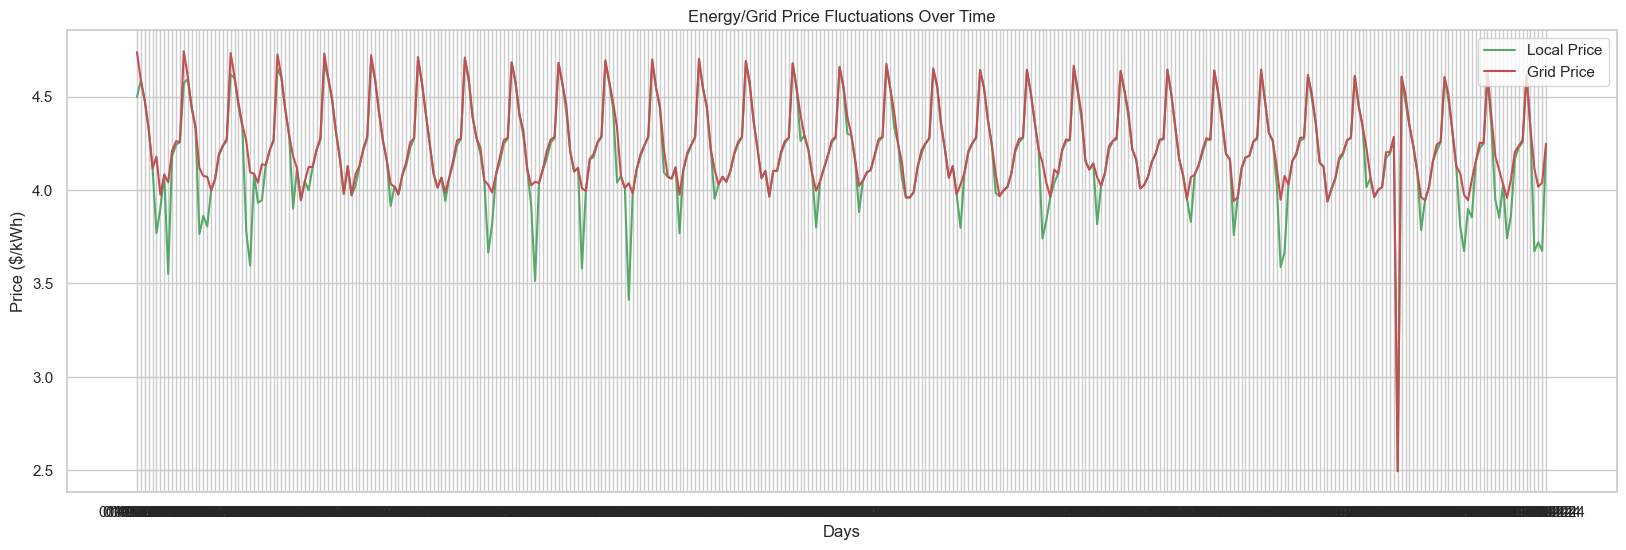

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the use of a nice style for the plots
sns.set_theme(style="whitegrid")

def plot_energy_demand_vs_supply(model):
    plt.title('Energy Demand vs Supply Over Time')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy (kWh)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def plot_energy_price_fluctuations(model):
    # WERKT NIET GOED MOMENTEEL!!!!!!!!!!!!!!!!!!!!
    daily_data = model.simulation_data.groupby(level=0).mean()
    plt.figure(figsize=(20, 6))

    plt.plot(daily_data["local_price"], label="Local Price", color="g")
    plt.plot(daily_data["grid_price"], label="Grid Price", color="r")

    plt.title('Energy/Grid Price Fluctuations Over Time')
    plt.xlabel('Days')
    plt.ylabel('Price ($/kWh)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def plot_surplus_deficit_distribution(model):
    plt.title('Surplus/Deficit Energy Distribution Across Households')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy (kWh)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


# Assuming you have an instance of the model `model`
# plot_energy_demand_vs_supply(sim)
plot_energy_price_fluctuations(sim)
# plot_surplus_deficit_distribution(sim)

## Batteries

In [119]:
class Battery:
    def __init__(self, capacity_kwh, c_rate, efficiency):
        self.capacity = capacity_kwh
        self.max_discharge = self.capacity * c_rate
        self.efficiency = efficiency
        self.state_of_charge = 0.0
        self.cost_of_battery = self.capacity * 750

    def charge(self, power_kw, duration_hr):
        # Limit the charging power to the maximum allowed
        power = min(power_kw, self.max_discharge)

        # Calculate the energy added, considering efficiency
        energy_added = power * duration_hr * self.efficiency

        # Update the soc without exceeding capacity
        self.state_of_charge = min(self.state_of_charge + energy_added, self.capacity)

    def discharge(self, power_kw, duration_hr):
        # Limit the discharging power to the maximum allowed
        power = min(power_kw, self.max_discharge)

        # Calculate the energy removed, considering efficiency
        energy_removed = power * duration_hr / self.efficiency

        # Update the soc without going below zero
        self.state_of_charge = max(self.state_of_charge - energy_removed, 0.0)

    @property
    def soc_percent(self):
        return 100 * (self.state_of_charge / self.capacity)

In [120]:
class NewGrid(mesa.Model):
    def __init__(self, n, consumption_data, production_data, solar_panel_odds=0.35, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.solar_panel_odds = solar_panel_odds

        self.consumption_data = consumption_data
        self.production_data = production_data

        self.datetime = datetime(2024, 1, 1)
        self.hour = 0
        self.day_str = self.datetime.strftime("%d-%m-%Y")

        self.hourly_demand = [0] * 24
        self.hourly_supply = [0] * 24
        self.energy_price = 0.16
        self.grid_price = 0.171

        self.smoothing = 0.3
        self.elasticity = 0.4
        self.min_price = 0.10

        self.avg_demand = 1
        self.avg_supply = 1

        self.daily_energy_prices = []  # Store energy price per day
        self.hourly_surplus_deficit = []  # Store surplus/deficit per hour for households
        self.total_consumption_per_hour = []  # Total energy consumption per hour
        self.total_production_per_hour = []  # Total energy production per hour
        self.household_solar_panels = []  # Store number of solar panels per household
        self.pressure_price_data = []  # Store pressure vs price data for plotting
        self.trade_price_data = []  # Store price vs surplus/deficit for trading
        self.total_demand_history = []  # List to hold cumulative demand data
        self.total_supply_history = []  # List to hold cumulative supply data

        Household_2.create_agents(model=self, n=n)
        self.grid_battery = Battery(500, 0.5, 0.9)

    def _time_skip(self):
        if self.hour != 23:
            self.hour += 1
        else:
            self.datetime += relativedelta(days=1)
            self.day_str = self.datetime.strftime("%d-%m-%Y")
            self.hour = 0
        
        if self.hour == 0:
            self._update_energy_price()
            self.collect_daily_data()

        # Collect data for the day
        self.collect_hourly_data()

    def _update_energy_price(self):
        target_price = self._calculate_target_price()

        # --- Smoothed Transition ---
        self.energy_price = (1 - self.smoothing) * self.energy_price + self.smoothing * target_price

        # Output energy price for the day
        print(f"[DAILY PRICE UPDATE :: {self.day_str}]: "
            f"Price={self.energy_price:.4f}"
            # f"Supply={self.hourly_supply}\n"
            # f"Demand={self.hourly_demand}"
            )

    def _calculate_target_price(self):
        min_price = 0.10
        max_price = self.grid_price
        
        demand_list = self.hourly_demand
        supply_list = self.hourly_supply

        # Avoid zero division
        valid_hours = [i for i in range(24) if supply_list[i] > 0]
        if not valid_hours:
            return self.grid_price  # fallback

        hourly_pressures = [
        demand_list[i] / supply_list[i] for i in valid_hours
        ]
        
        # Calculate the average pressure across valid hours
        pressure = np.mean(hourly_pressures)

        # If demand exceeds supply, increase the price, but with diminishing returns
        if pressure > 1:
            # The more extreme the imbalance, the stronger the price increase
            price_increase = (pressure - 1) * self.elasticity
            new_price = self.energy_price * (1 + price_increase)
        else:
            # If supply exceeds demand, decrease the price but not too sharply
            price_decrease = (1 - pressure) * self.elasticity
            new_price = self.energy_price * (1 - price_decrease)

        # Apply bounds to ensure the price stays within the limits
        new_price = max(min_price, min(new_price, max_price))

        return new_price

    def collect_daily_data(self):
        # Collect the daily totals (once per day)
        self.total_demand_history.append(sum(self.hourly_demand))
        self.total_supply_history.append(sum(self.hourly_supply))

        self.daily_energy_prices.append(self.energy_price)

        # Reset hourly data for the next day
        self.hourly_demand = [0] * 24
        self.hourly_supply = [0] * 24

    def collect_hourly_data(self):
        # Collect hourly data that updates every hour
        self.total_consumption_per_hour.append(sum(agent.consumed for agent in self.agents))
        self.total_production_per_hour.append(sum(agent.produced for agent in self.agents))

        surplus_deficit = [agent.remaining_energy for agent in self.agents]
        self.hourly_surplus_deficit.append(surplus_deficit)

        # Collect household solar panel distribution
        solar_panels = [agent.solar_panel_area for agent in self.agents]
        self.household_solar_panels.append(solar_panels)

        # Collect pressure vs price data
        pressures = [self.avg_demand / self.avg_supply]
        self.pressure_price_data.extend(zip(pressures, [self.energy_price] * len(pressures)))

        # Collect price vs surplus/deficit data for trading
        for agent in self.agents:
            self.trade_price_data.append((agent.remaining_energy, agent.energy_price))

        net_production = sum(agent.produced for agent in self.agents)
        net_consumption = sum(agent.consumed for agent in self.agents)
        net_deficit = net_consumption - net_production

        # Case 1: There is a deficit → try to discharge the battery first
        if net_deficit > 0:
            # Determine how much battery can cover
            max_battery_discharge = self.grid_battery.max_discharge
            available_energy = self.grid_battery.state_of_charge
            battery_coverage = min(net_deficit, max_battery_discharge, available_energy)

            # Discharge the battery
            if battery_coverage > 0:
                self.grid_battery.discharge(power_kw=battery_coverage, duration_hr=1)
                net_deficit -= battery_coverage

            # Now `net_deficit` is the amount still needed from the external grid
            self.hourly_supply[self.hour] += battery_coverage

        # Case 2: There is a surplus → charge the battery
        else:
            net_surplus = -net_deficit
            self.grid_battery.charge(power_kw=net_surplus, duration_hr=1)

        if not hasattr(self, "battery_soc_history"):
            self.battery_soc_history = []
        self.battery_soc_history.append(self.grid_battery.state_of_charge)


    def step(self):
        self.agents.shuffle_do("trade_energy")
        for agent in self.agents:
            print(f"""
            Statistics for Agent {agent}:
            Current day: {self.day_str}
            Current energy price: {agent.energy_price}
            Current remaining energy: {agent.remaining_energy}
            Last consumed: {agent.consumed}
            Last produced: {agent.produced}
            Total agent amount: {self.num_agents}
            """)

    def long_step(self, n):
        for _ in range(0, n):
            self.agents.shuffle_do("trade_energy")

            self._time_skip()

In [108]:
consumption_df = generate_household_dataframe(n_days=365, n_households=30, profile_ratios=profile_ratios)

In [121]:
sim = NewGrid(30, consumption_df, production_df, solar_panel_odds=0.35)
sim.long_step(365*24)

[DAILY PRICE UPDATE :: 02-01-2024]: Price=0.1633
[DAILY PRICE UPDATE :: 03-01-2024]: Price=0.1656
[DAILY PRICE UPDATE :: 04-01-2024]: Price=0.1672
[DAILY PRICE UPDATE :: 05-01-2024]: Price=0.1684
[DAILY PRICE UPDATE :: 06-01-2024]: Price=0.1692
[DAILY PRICE UPDATE :: 07-01-2024]: Price=0.1697
[DAILY PRICE UPDATE :: 08-01-2024]: Price=0.1701
[DAILY PRICE UPDATE :: 09-01-2024]: Price=0.1704
[DAILY PRICE UPDATE :: 10-01-2024]: Price=0.1706
[DAILY PRICE UPDATE :: 11-01-2024]: Price=0.1707
[DAILY PRICE UPDATE :: 12-01-2024]: Price=0.1708
[DAILY PRICE UPDATE :: 13-01-2024]: Price=0.1708
[DAILY PRICE UPDATE :: 14-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 15-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 16-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 17-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 18-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 19-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 20-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 21-01-2024]: Price=0.1710
[DAILY PRICE UPDATE 

KeyboardInterrupt: 

## 0.35 Solar panel odds w battery. Perc charge old logic

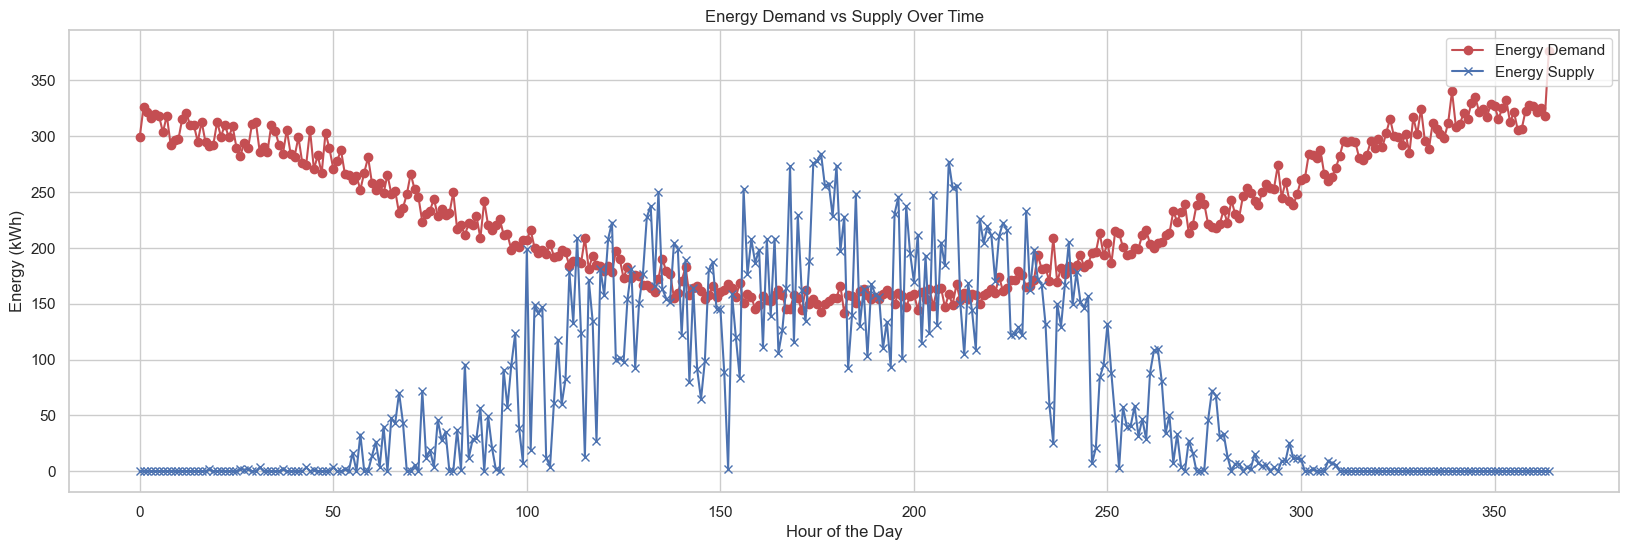

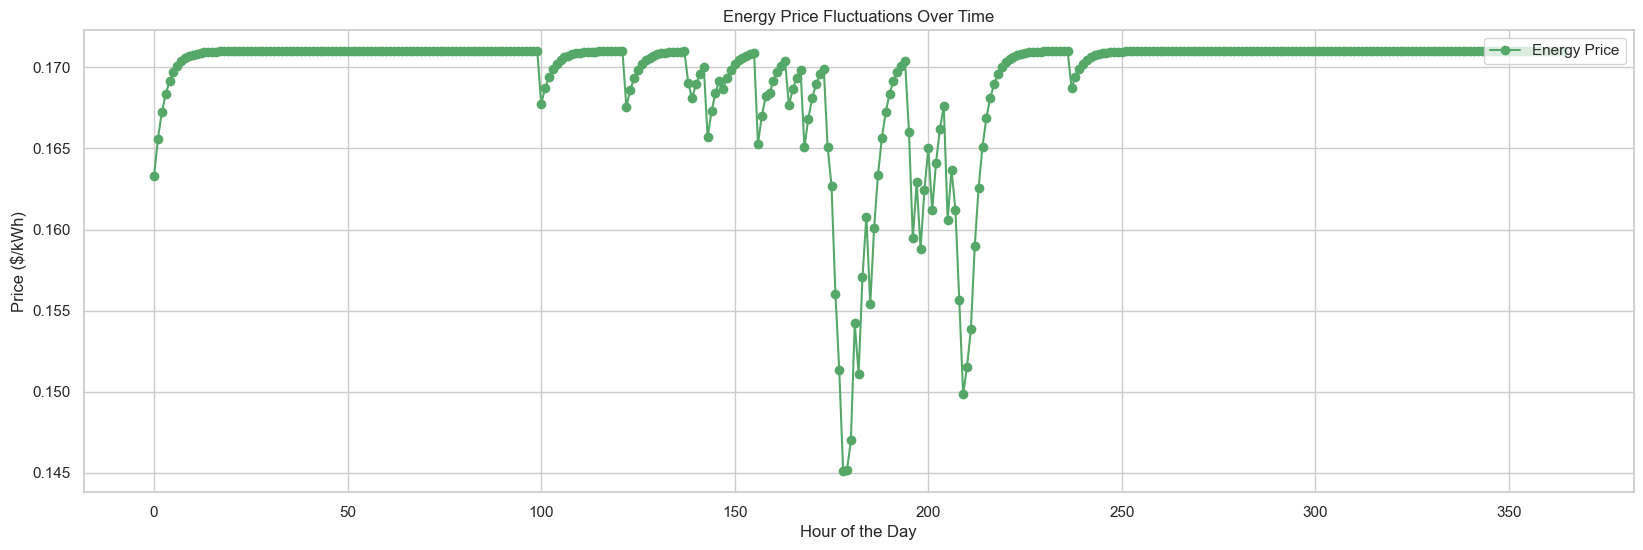

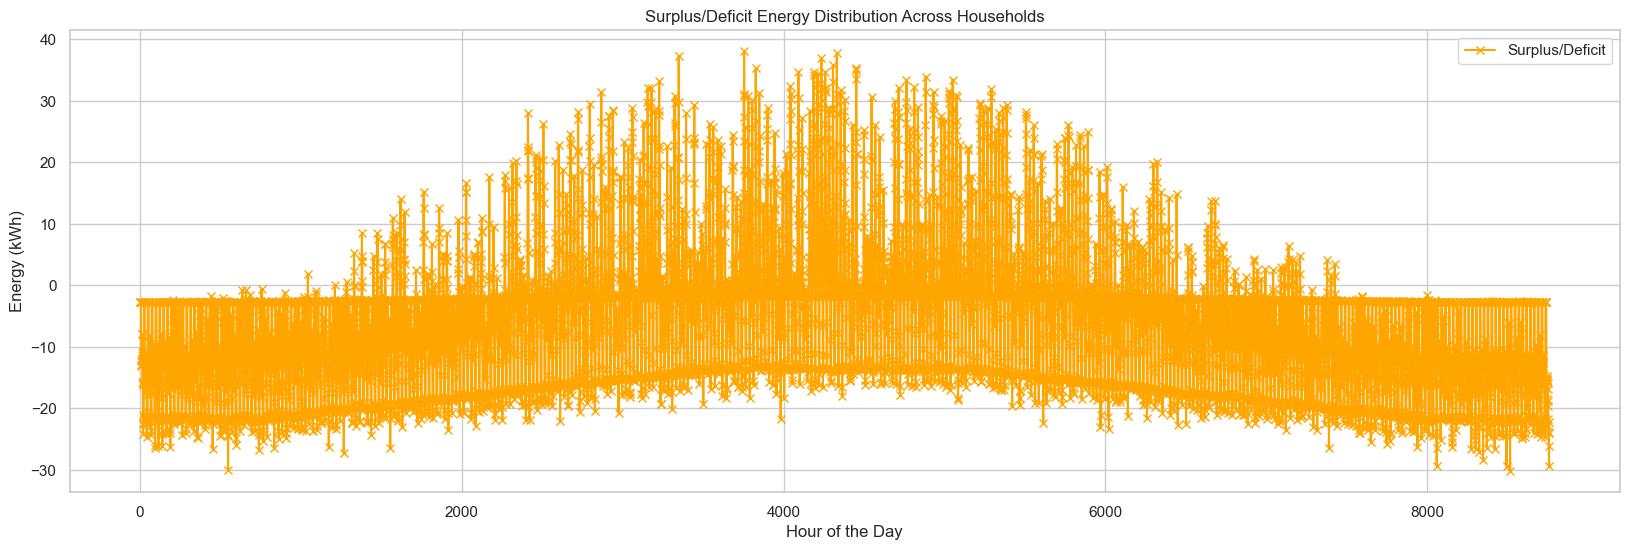

In [117]:
plot_energy_demand_vs_supply(sim)
plot_energy_price_fluctuations(sim)
plot_surplus_deficit_distribution(sim)

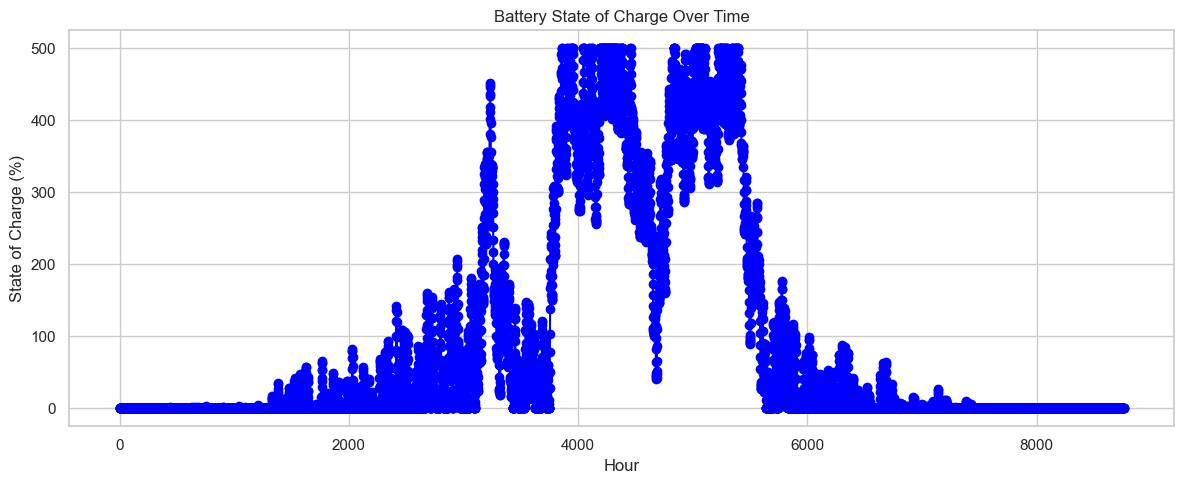

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(sim.battery_soc_history, marker='o', linestyle='-', color='blue')
plt.title("Battery State of Charge Over Time")
plt.xlabel("Hour")
plt.ylabel("State of Charge")
# plt.ylim(0, 2000)
plt.grid(True)
plt.tight_layout()
plt.show()

## 0.5 solar panel odds w battery

In [122]:
sim = NewGrid(30, consumption_df, production_df, solar_panel_odds=0.5)
sim.long_step(365*24)

[DAILY PRICE UPDATE :: 02-01-2024]: Price=0.1633
[DAILY PRICE UPDATE :: 03-01-2024]: Price=0.1656
[DAILY PRICE UPDATE :: 04-01-2024]: Price=0.1672
[DAILY PRICE UPDATE :: 05-01-2024]: Price=0.1684
[DAILY PRICE UPDATE :: 06-01-2024]: Price=0.1692
[DAILY PRICE UPDATE :: 07-01-2024]: Price=0.1697
[DAILY PRICE UPDATE :: 08-01-2024]: Price=0.1701
[DAILY PRICE UPDATE :: 09-01-2024]: Price=0.1704
[DAILY PRICE UPDATE :: 10-01-2024]: Price=0.1706
[DAILY PRICE UPDATE :: 11-01-2024]: Price=0.1707
[DAILY PRICE UPDATE :: 12-01-2024]: Price=0.1708
[DAILY PRICE UPDATE :: 13-01-2024]: Price=0.1708
[DAILY PRICE UPDATE :: 14-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 15-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 16-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 17-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 18-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 19-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 20-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 21-01-2024]: Price=0.1710
[DAILY PRICE UPDATE 

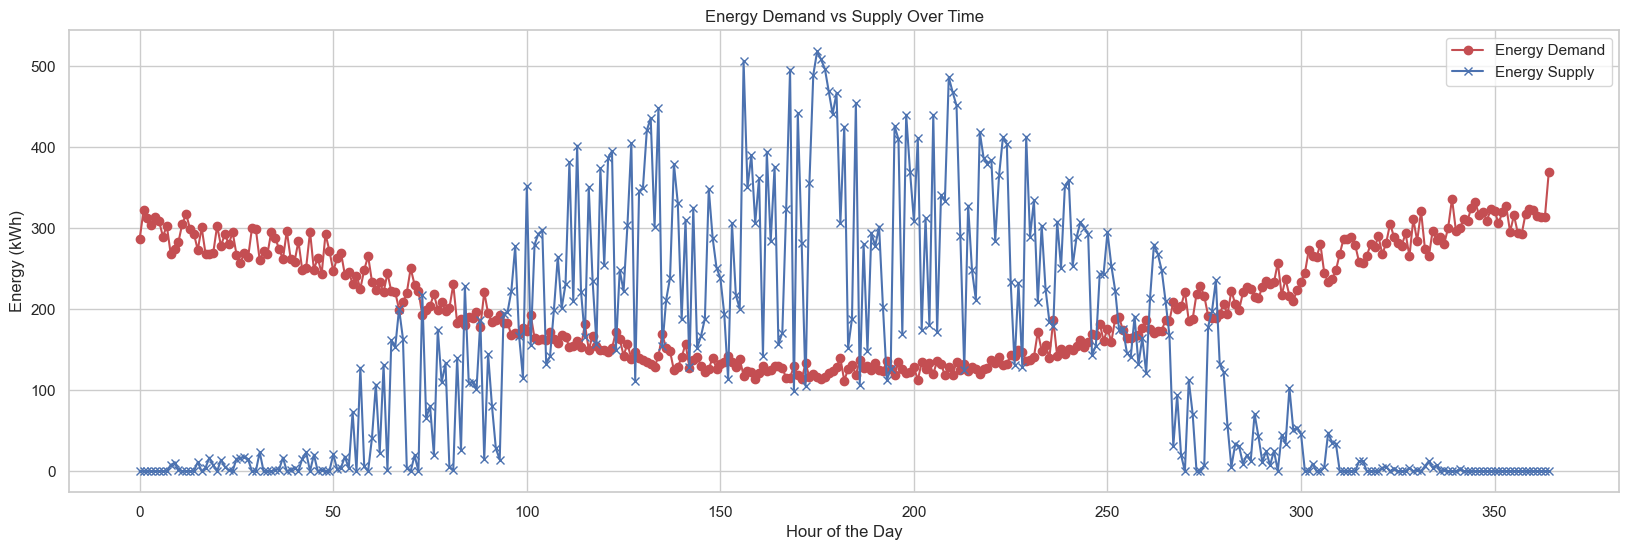

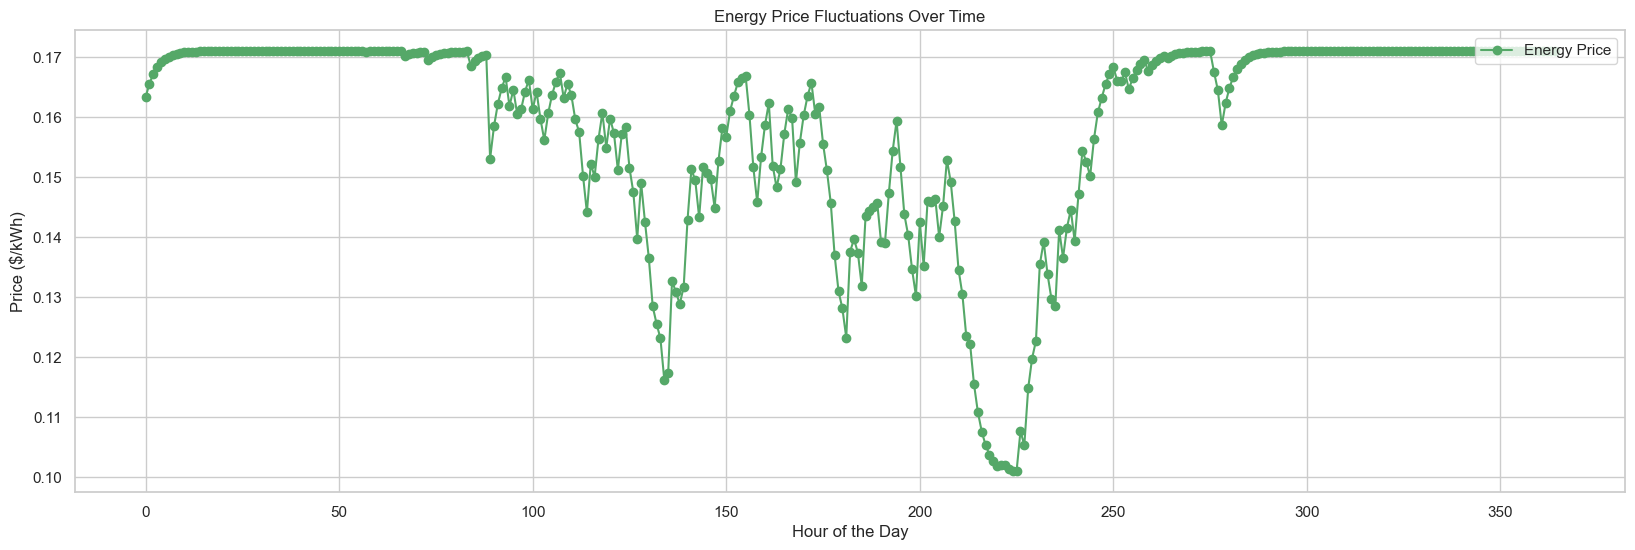

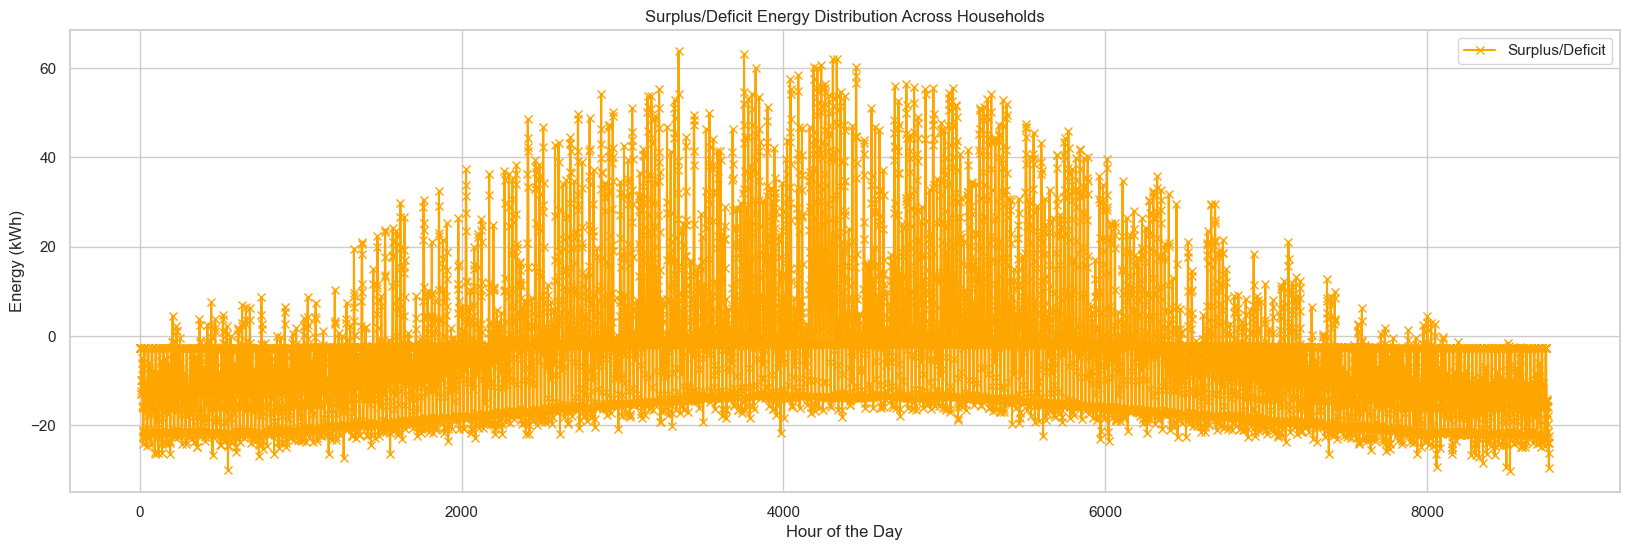

In [123]:
plot_energy_demand_vs_supply(sim)
plot_energy_price_fluctuations(sim)
plot_surplus_deficit_distribution(sim)

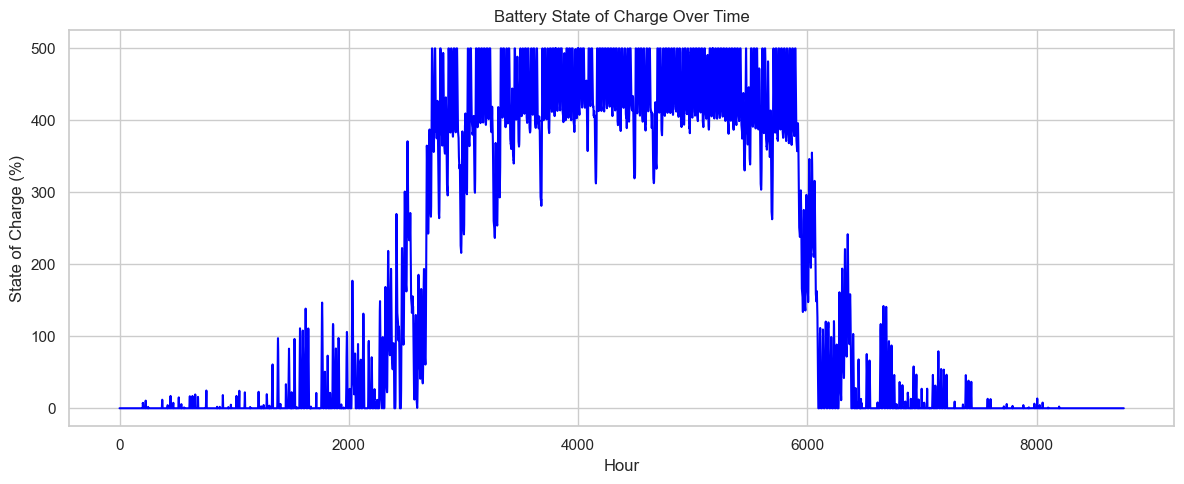

In [125]:
plt.figure(figsize=(12, 5))
plt.plot(sim.battery_soc_history, linestyle='-', color='blue')
plt.title("Battery State of Charge Over Time")
plt.xlabel("Hour")
plt.ylabel("State of Charge (%)")
# plt.ylim(0, 2000)
plt.grid(True)
plt.tight_layout()
plt.show()

## 0.5 solar panel odds w battery

In [126]:
sim = NewGrid(30, consumption_df, production_df, solar_panel_odds=0.5)
sim.long_step(365*24)

[DAILY PRICE UPDATE :: 02-01-2024]: Price=0.1633
[DAILY PRICE UPDATE :: 03-01-2024]: Price=0.1656
[DAILY PRICE UPDATE :: 04-01-2024]: Price=0.1672
[DAILY PRICE UPDATE :: 05-01-2024]: Price=0.1684
[DAILY PRICE UPDATE :: 06-01-2024]: Price=0.1692
[DAILY PRICE UPDATE :: 07-01-2024]: Price=0.1697
[DAILY PRICE UPDATE :: 08-01-2024]: Price=0.1701
[DAILY PRICE UPDATE :: 09-01-2024]: Price=0.1704
[DAILY PRICE UPDATE :: 10-01-2024]: Price=0.1706
[DAILY PRICE UPDATE :: 11-01-2024]: Price=0.1707
[DAILY PRICE UPDATE :: 12-01-2024]: Price=0.1708
[DAILY PRICE UPDATE :: 13-01-2024]: Price=0.1708
[DAILY PRICE UPDATE :: 14-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 15-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 16-01-2024]: Price=0.1709
[DAILY PRICE UPDATE :: 17-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 18-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 19-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 20-01-2024]: Price=0.1710
[DAILY PRICE UPDATE :: 21-01-2024]: Price=0.1710
[DAILY PRICE UPDATE 

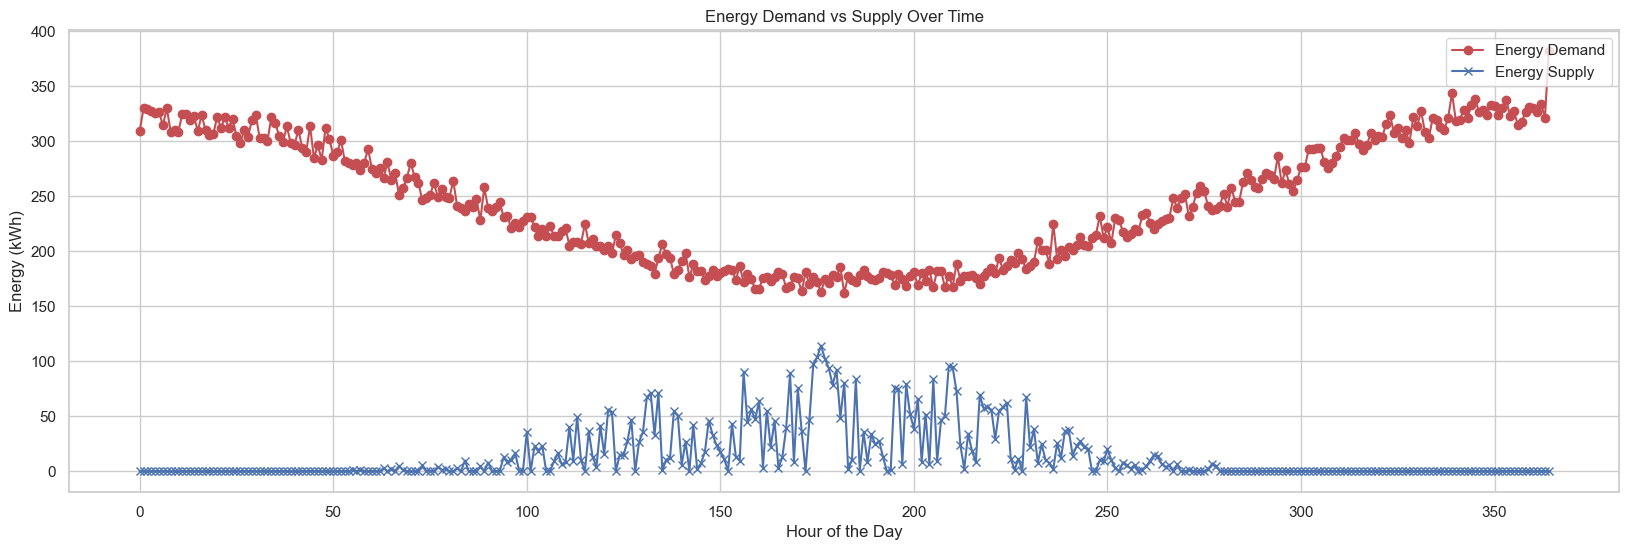

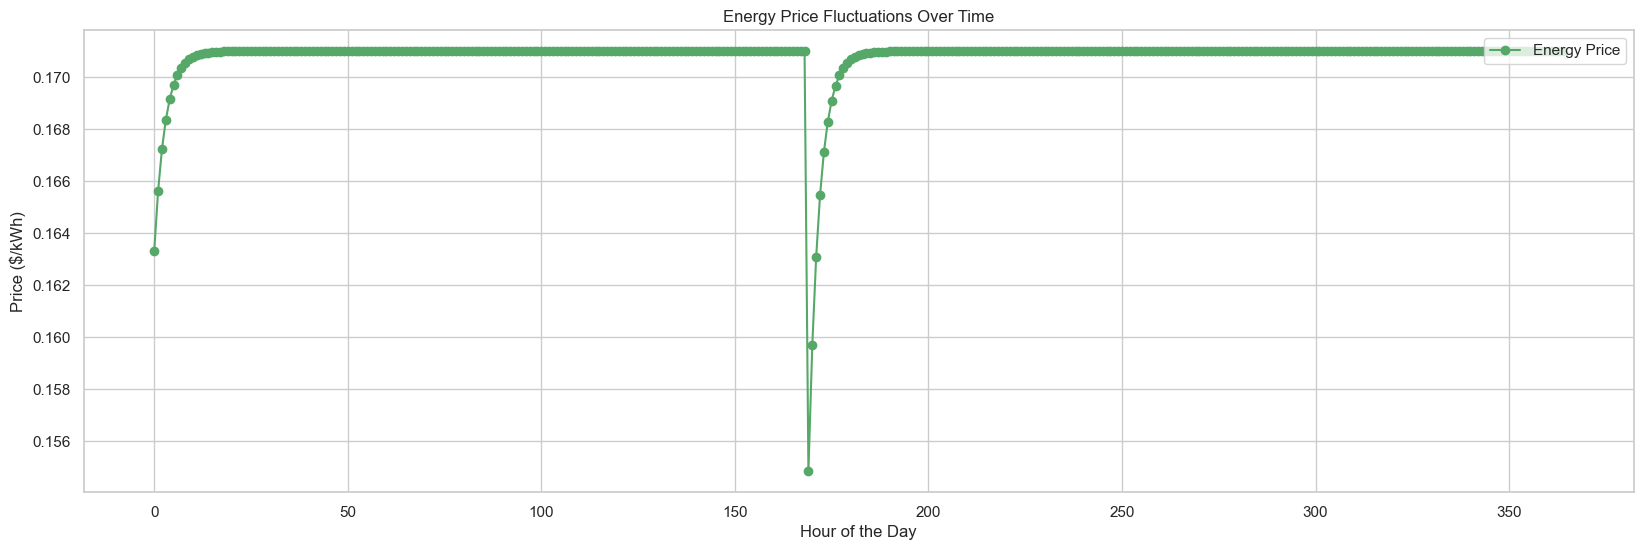

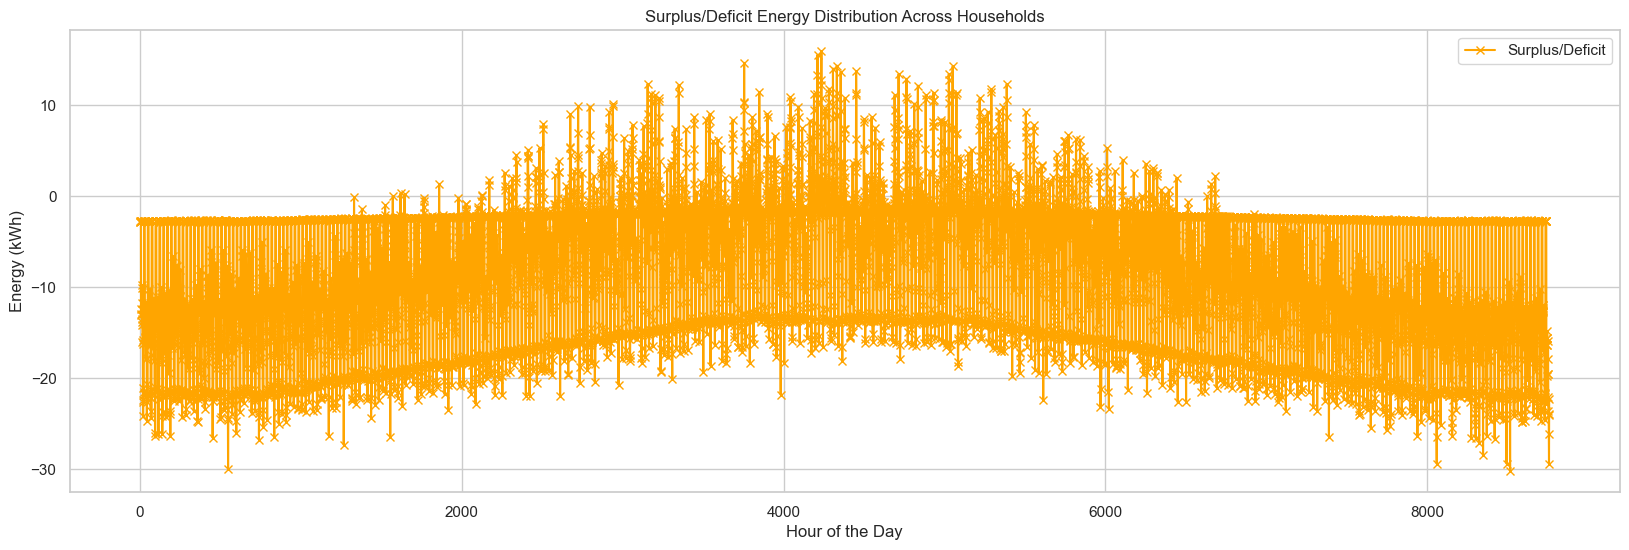

In [127]:
plot_energy_demand_vs_supply(sim)
plot_energy_price_fluctuations(sim)
plot_surplus_deficit_distribution(sim)

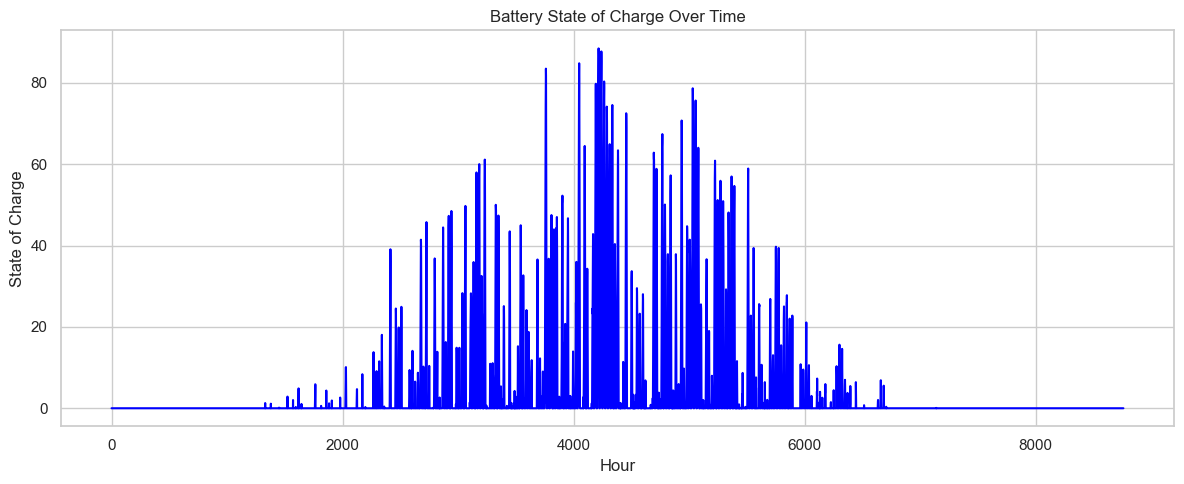

In [129]:
plt.figure(figsize=(12, 5))
plt.plot(sim.battery_soc_history, linestyle='-', color='blue')
plt.title("Battery State of Charge Over Time")
plt.xlabel("Hour")
plt.ylabel("State of Charge")
# plt.ylim(0, 2000)
plt.grid(True)
plt.tight_layout()
plt.show()